In [19]:
import pickle
import string

import ajf_plts
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

T_s = 0.000605

plt.style.use(["./ajf_plts/base.mplstyle"])

In [2]:
data = pd.read_csv("./Voltage.txt", sep="\t", names=["x", "y", "z"], skiprows=7)

T_s = 0.000605

data["t"] = np.arange(len(data)) * T_s

data = data.set_index("t")

chan_sens = 2.0

data[["x", "y", "z"]] /= chan_sens

data = data.apply(lambda s: signal.detrend(s), axis=0)

fc = 1.0

b, a = signal.iirfilter(
    N=4, Wn=fc, btype="lowpass", ftype="butter", analog=False, fs=1.0 / T_s, output="ba"
)

data = data.apply(lambda s: signal.lfilter(b, a, s), axis=0)

data.x *= 1e3

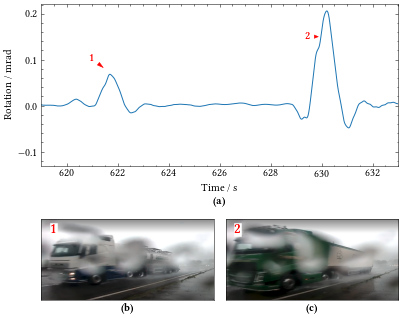

In [73]:
###############################################################################
# Extract signals to plot
###############################################################################
x_min = 619
x_max = 633

# t_vals = data.index.values[
#     np.where(np.logical_and(x_min <= data.index.values, data.index.values <= x_max))
# ]
#
# data = data.loc[t_vals]

data.x -= data.x.iloc[0]

figsize = (ajf_plts.text_width_inches, 2.0 * ajf_plts.fig_height_inches)
fig, axes = plt.subplots(
    figsize=figsize, ncols=2, nrows=2, gridspec_kw={"height_ratios": [2.0, 1.0]}
)
gs = axes[0, 1].get_gridspec()
for a in axes[0, 0:]:
    a.remove()
ax = fig.add_subplot(gs[0:2])

cap_axes = []

# ax =  fig.add_subplot(2,1,1)

cap_axes.append(ax)

data.x.plot(ax=ax)

ax.set_xlim(619, 633)

ax.set_xlabel("Time / s")
ax.set_ylabel("Rotation / mrad")

annot_kwargs = dict(
    c="r",
    xycoords="data",
    textcoords="offset points",
    arrowprops=dict(color="red", arrowstyle="wedge"),
    horizontalalignment="right",
    verticalalignment="bottom",
)

ax.annotate(r"$\mathbf{1}$", xy=(621.5, 0.08), xytext=(-10, 5), **annot_kwargs)
ax.annotate(r"$\mathbf{2}$", xy=(629.95, 0.15), xytext=(-10, -5), **annot_kwargs)


v_axes = axes.ravel()[2:]
cap_axes.extend(v_axes)

[a.set_xticks([], []) for a in v_axes]
[a.set_yticks([], []) for a in v_axes]

v_axes[0].imshow(
    mpl.image.imread("../chapter_4/data/line_bridge/line_bridge_vehicle_3.png"),
    aspect="auto",
)
v_axes[1].imshow(
    mpl.image.imread("../chapter_4/data/line_bridge/line_bridge_vehicle_4.png"),
    aspect="auto",
)

ajf_plts.caption_subplots(
    v_axes,
    v_pos=0.95,
    h_pos=0.05,
    va="top",
    ha="left",
    labels=string.digits,
    label_format=r"$\mathbf{{{}}}$",
    start_val=1,
    kwargs=dict(
        c="r",
        size=14,
        bbox={"color": "white", "pad": 0},
    ),
)


ajf_plts.caption_axes(cap_axes)

fig.tight_layout()
ajf_plts.save_fig(fig, "figLineBridgeRot619-633.pdf")

In [67]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

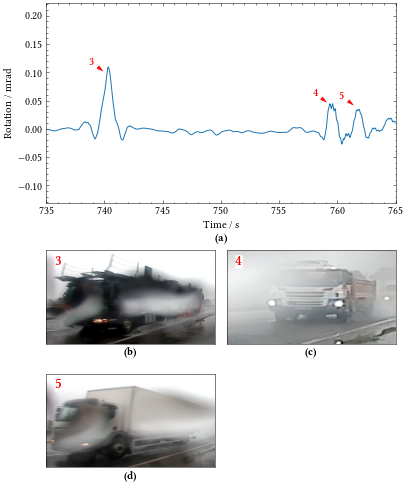

In [48]:
###############################################################################
# Extract signals to plot
###############################################################################
x_min = 735
x_max = 765

# t_vals = data.index.values[
#     np.where(np.logical_and(x_min <= data.index.values, data.index.values <= x_max))
# ]
#
# data = data.loc[t_vals]

data.x -= data.x.iloc[0]

figsize = (ajf_plts.text_width_inches, 3.0 * ajf_plts.fig_height_inches)
fig = plt.figure(figsize=figsize)

cap_axes = []

ax = fig.add_subplot(2, 1, 1)

cap_axes.append(ax)

data.x.plot(ax=ax)

ax.set_xlim(x_min, x_max)

ax.set_xlabel("Time / s")
ax.set_ylabel("Rotation / mrad")

annot_kwargs = dict(
    c="r",
    xycoords="data",
    textcoords="offset points",
    arrowprops=dict(color="red", arrowstyle="wedge"),
    horizontalalignment="right",
    verticalalignment="bottom",
)

ax.annotate(r"$\mathbf{3}$", xy=(740, 0.1), xytext=(-10, 5), **annot_kwargs)
ax.annotate(r"$\mathbf{4}$", xy=(759.2, 0.045), xytext=(-10, 5), **annot_kwargs)
ax.annotate(r"$\mathbf{5}$", xy=(761.5, 0.04), xytext=(-10, 5), **annot_kwargs)


v_axes = [fig.add_subplot(4, 2, 5 + i) for i in range(3)]

cap_axes.extend(v_axes)

[a.set_xticks([], []) for a in v_axes]
[a.set_yticks([], []) for a in v_axes]

v_axes[0].imshow(
    mpl.image.imread("../chapter_4/data/line_bridge/12.21.png"), aspect="auto"
)
v_axes[1].imshow(
    mpl.image.imread("../chapter_4/data/line_bridge/12.38.png"), aspect="auto"
)
v_axes[2].imshow(
    mpl.image.imread("../chapter_4/data/line_bridge/12.42.png"), aspect="auto"
)

ajf_plts.caption_subplots(
    v_axes,
    v_pos=0.95,
    h_pos=0.05,
    va="top",
    ha="left",
    labels=string.digits,
    label_format=r"$\mathbf{{{}}}$",
    start_val=3,
    kwargs=dict(
        c="r",
        size=14,
        bbox={"color": "white", "pad": 0},
    ),
)

ajf_plts.caption_axes(cap_axes)

fig.tight_layout(h_pad=-1.0)
ajf_plts.save_fig(fig, "figLineBridgeRot735-765.pdf")